# Data Import and Prep

In [1]:
import pandas as pd
df = pd.read_csv('developed features 19.csv', index_col=0)
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
7689,19,58409148,58416858,positive,201514,ZNF584,NP_001304931.1,145,zinc finger protein 584 isoform 2,19,...,1863225,2543302125,354025,210644875,665856,543338496,131044,47437928,3504384,6560206848
5530,19,50798095,50798448,negative,84798,C19orf48,NP_001277084.1,117,uncharacterized protein C19orf48,19,...,705600,592704000,1147041,1228480911,1498176,1833767424,131044,47437928,342225,200201625
7822,Un,148495,162366,positive,3813,KIR3DS1,NP_001077008.1,382,killer cell immunoglobulin-like receptor 3DS1 ...,HSCHR19KIR_0019-4656-B_CTG3_1,...,19448100,85766121000,4588164,9827847288,2039184,2911954752,3964081,7892485271,9253764,28149950088
6816,19,54850476,54866731,positive,3812,KIR3DL2,NP_006728.2,455,killer cell immunoglobulin-like receptor 3DL2 ...,19,...,27562500,144703125000,7491169,20503329553,2039184,2911954752,5536609,13027640977,16769025,68669157375
4416,19,43962727,43967356,positive,7638,ZNF221,NP_001284517.1,617,zinc finger protein 221,19,...,34574400,203297472000,8850625,26330609375,2039184,2911954752,7371225,20012875875,8555625,25025203125


In [2]:
# nans identification
print(len(df))
df.isna().sum().sum()

7981


0

In [3]:
import numpy as np
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Sequence-Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Number of Selenocysteines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Proline

In [4]:
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [5]:
# code to drop duplicate row if necessary
# df.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(df.duplicated().sum()))
# print(len(df))
# df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Columns: 298 entries, #Replicon Name to Weight of Valines**3
dtypes: float64(142), int64(141), object(15)
memory usage: 18.2+ MB


In [7]:
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,1.476312e+08,3.120884e+13,1.559955e+08,4.093666e+13,3.756917e+06,2.431349e+10,1.143370e+07,1.054670e+11,3.157250e+07,1.335664e+12
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,2.881577e+09,7.816783e+14,3.468645e+09,1.030384e+15,1.716183e+07,3.045903e+11,4.181545e+07,1.110292e+12,3.210278e+08,2.815048e+13
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,5.336100e+06,1.232639e+10,2.775556e+06,4.624076e+09,3.745440e+05,2.292209e+08,1.179396e+06,1.280824e+09,3.080025e+06,5.405444e+09
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,1.428840e+07,5.401015e+10,7.491169e+06,2.050333e+10,1.040400e+06,1.061208e+09,3.964081e+06,7.892485e+09,6.625476e+06,1.705398e+10
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,3.335062e+07,1.925999e+11,1.734722e+07,7.225119e+10,2.663424e+06,4.346708e+09,1.182672e+07,4.067209e+10,1.582448e+07,6.294980e+10
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,7.724786e+10,2.146989e+16,9.360479e+10,2.863829e+16,3.996801e+08,7.990404e+12,9.579644e+08,2.964996e+13,8.392575e+09,7.688522e+14


# Deciding which columns to include in a classification model

In [8]:
for i in df.columns:
    print(i)

#Replicon Name
Start
Stop
Strand
GeneID
Locus
Protein product
Length
Protein name
# Sequence-Name
Sequence-Role
Assigned-Molecule-Location/Type
GenBank-Accn
Relationship
RefSeq-Accn
Assembly-Unit
Sequence-Length
UCSC-style-name
Accession Version
Molecular Weight
Number of Regions
Number of Binding Sites
Sequence
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Number of Selenocysteines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
L

In [9]:
df['#Replicon Name'].unique() # either chromosome 19 or unassigned

array(['19', 'Un'], dtype=object)

In [10]:
df['Strand'].unique() # chromosomes have two strands, negative and positive --> potential classification system that would yield information on organization of protein information

array(['positive', 'negative'], dtype=object)

In [11]:
df['GeneID'].unique() # drop this, human naming convention, also out of date naming system

array([    81099,      8612,     54531, ..., 112268337, 112268340,
       102725035], dtype=int64)

In [12]:
df['Locus'].unique() # indicates location on chromosome where information is stored

array(['OR4F17', 'PLPP2', 'MIER2', ..., 'LOC112268337', 'LOC112268340',
       'LOC102725035'], dtype=object)

In [13]:
len(df['Locus'].unique()) # not a good way to classify protein information --> too many options

1414

In [14]:
sum(df['Locus'].value_counts()>50) # however, if we dropped all data that has less than 50 entries, we get 7 categories to classify into

7

In [15]:
df['Protein product'].unique() # drop this, human naming convention

array(['NP_001005240.1', 'XP_011526698.1', 'NP_808211.1', ...,
       'XP_011546877.1', 'XP_011546876.1', 'NP_945339.2'], dtype=object)

In [16]:
len(df['Protein product'].unique()) # one of the unique identifiers for one of the three datasets that compose this dataset

6749

In [17]:
df['Protein name'].unique() # unique identifer for this dataset

array(['olfactory receptor 4F17', 'phospholipid phosphatase 2 isoform X1',
       'phospholipid phosphatase 2 isoform 3', ...,
       'killer cell immunoglobulin-like receptor 2DS1 isoform X4',
       'killer cell immunoglobulin-like receptor 2DS1 isoform X3',
       'leukocyte receptor cluster member 9 isoform 1'], dtype=object)

In [18]:
len(df['Protein name'])

7981

In [19]:
df.index = df['Protein name']

In [20]:
df['# Sequence-Name'].unique() # drop this, human naming convention

array(['19', 'HSCHR19_5_CTG2', 'HSCHR19_4_CTG2', 'HG109_PATCH',
       'HSCHR19_1_CTG2', 'HSCHR19_2_CTG2', 'HSCHR19_3_CTG2',
       'HSCHR19_1_CTG3_1', 'HSCHR19_2_CTG3_1', 'HG26_PATCH',
       'HG2021_PATCH', 'HSCHR19_3_CTG3_1', 'HSCHR19LRC_COX1_CTG3_1',
       'HSCHR19LRC_COX2_CTG3_1', 'HSCHR19LRC_LRC_I_CTG3_1',
       'HSCHR19LRC_LRC_J_CTG3_1', 'HSCHR19LRC_LRC_S_CTG3_1',
       'HSCHR19LRC_LRC_T_CTG3_1', 'HSCHR19LRC_PGF1_CTG3_1',
       'HSCHR19KIR_0019-4656-A_CTG3_1', 'HSCHR19KIR_CA01-TA01_1_CTG3_1',
       'HSCHR19KIR_CA01-TA01_2_CTG3_1', 'HSCHR19KIR_CA01-TB04_CTG3_1',
       'HSCHR19KIR_CA01-TB01_CTG3_1', 'HSCHR19KIR_HG2394_CTG3_1',
       'HSCHR19KIR_502960008-2_CTG3_1', 'HSCHR19KIR_502960008-1_CTG3_1',
       'HSCHR19KIR_0010-5217-AB_CTG3_1', 'HSCHR19KIR_7191059-1_CTG3_1',
       'HSCHR19KIR_CA04_CTG3_1', 'HSCHR19KIR_HG2393_CTG3_1',
       'HSCHR19KIR_7191059-2_CTG3_1', 'HSCHR19KIR_HG2396_CTG3_1',
       'HSCHR19KIR_FH15_B_HAP_CTG3_1', 'HSCHR19KIR_G085_A_HAP_CTG3_1',
       'HSC

In [21]:
df['Sequence-Role'].unique() # drop this, human related notation for updating the database where information originated

array(['assembled-molecule', 'alt-scaffold', 'fix-patch', 'novel-patch'],
      dtype=object)

In [22]:
df['Assigned-Molecule-Location/Type'].unique() # drop this, not useful for classification

array(['Chromosome'], dtype=object)

In [23]:
df['GenBank-Accn'].unique() # drop this, human naming convention

array(['CM000681.2', 'KI270868.1', 'KI270865.1', 'ML143376.1',
       'GL383573.1', 'GL383575.2', 'GL383576.1', 'GL383574.1',
       'KI270866.1', 'KQ458386.1', 'KN196484.1', 'KI270867.1',
       'GL949746.1', 'GL949747.2', 'GL949748.2', 'GL949749.2',
       'GL949750.2', 'GL949751.2', 'GL949752.1', 'KV575246.1',
       'KV575247.1', 'KV575248.1', 'KV575249.1', 'KV575250.1',
       'KV575251.1', 'KV575252.1', 'KV575253.1', 'KV575254.1',
       'KV575255.1', 'KV575257.1', 'KV575258.1', 'KV575259.1',
       'KV575260.1', 'KI270882.1', 'KI270883.1', 'KI270884.1',
       'KI270885.1', 'KI270886.1', 'KI270887.1', 'KI270888.1',
       'KI270889.1', 'KI270890.1', 'KI270891.1', 'KI270914.1',
       'KI270915.1', 'KI270916.1', 'KI270917.1', 'KI270918.1',
       'KI270919.1', 'KI270920.1', 'KI270921.1', 'KI270922.1',
       'KI270923.1', 'KI270929.1', 'KI270930.1', 'KI270931.1',
       'KI270932.1', 'KI270933.1', 'GL000209.2', 'KV575256.1'],
      dtype=object)

In [24]:
df['Relationship'].unique() # drop this, human identified relationship between GenBank-Accn and RefSeq-Accn, also not good for classification

array(['='], dtype=object)

In [25]:
df['RefSeq-Accn'].unique() # drop this, human naming convention

array(['NC_000019.10', 'NT_187622.1', 'NT_187621.1', 'NW_021160022.1',
       'NW_003315962.1', 'NW_003315964.2', 'NW_003315965.1',
       'NW_003315963.1', 'NT_187619.1', 'NW_014040929.1',
       'NW_009646206.1', 'NT_187620.1', 'NW_003571054.1',
       'NW_003571055.2', 'NW_003571056.2', 'NW_003571057.2',
       'NW_003571058.2', 'NW_003571059.2', 'NW_003571060.1',
       'NW_016107300.1', 'NW_016107301.1', 'NW_016107302.1',
       'NW_016107303.1', 'NW_016107304.1', 'NW_016107305.1',
       'NW_016107306.1', 'NW_016107307.1', 'NW_016107308.1',
       'NW_016107309.1', 'NW_016107311.1', 'NW_016107312.1',
       'NW_016107313.1', 'NW_016107314.1', 'NT_187636.1', 'NT_187637.1',
       'NT_187638.1', 'NT_187639.1', 'NT_187640.1', 'NT_187641.1',
       'NT_187642.1', 'NT_187643.1', 'NT_187644.1', 'NT_187645.1',
       'NT_187668.1', 'NT_187669.1', 'NT_187670.1', 'NT_187671.1',
       'NT_187672.1', 'NT_187673.1', 'NT_187674.1', 'NT_187675.1',
       'NT_187676.1', 'NT_187677.1', 'NT_1876

In [26]:
df['Assembly-Unit'].unique() # potential classifier, the alt ref loci groups show different protein sequences than is shown in the primary assembly

array(['Primary Assembly', 'ALT_REF_LOCI_1', 'PATCHES', 'ALT_REF_LOCI_2',
       'ALT_REF_LOCI_3', 'ALT_REF_LOCI_4', 'ALT_REF_LOCI_5',
       'ALT_REF_LOCI_6', 'ALT_REF_LOCI_7', 'ALT_REF_LOCI_10',
       'ALT_REF_LOCI_11', 'ALT_REF_LOCI_12', 'ALT_REF_LOCI_13',
       'ALT_REF_LOCI_14', 'ALT_REF_LOCI_15', 'ALT_REF_LOCI_16',
       'ALT_REF_LOCI_17', 'ALT_REF_LOCI_18', 'ALT_REF_LOCI_19',
       'ALT_REF_LOCI_20', 'ALT_REF_LOCI_21', 'ALT_REF_LOCI_22',
       'ALT_REF_LOCI_23', 'ALT_REF_LOCI_24', 'ALT_REF_LOCI_25',
       'ALT_REF_LOCI_26', 'ALT_REF_LOCI_27', 'ALT_REF_LOCI_28',
       'ALT_REF_LOCI_29', 'ALT_REF_LOCI_30', 'ALT_REF_LOCI_31',
       'ALT_REF_LOCI_32', 'ALT_REF_LOCI_33', 'ALT_REF_LOCI_34',
       'ALT_REF_LOCI_35'], dtype=object)

In [27]:
df['Assembly-Unit'].value_counts() # need to correct for bias, outside of scope of this project

Primary Assembly    6702
PATCHES              266
ALT_REF_LOCI_1       158
ALT_REF_LOCI_7       120
ALT_REF_LOCI_2        86
ALT_REF_LOCI_4        64
ALT_REF_LOCI_3        62
ALT_REF_LOCI_6        60
ALT_REF_LOCI_5        59
ALT_REF_LOCI_27       33
ALT_REF_LOCI_29       27
ALT_REF_LOCI_28       23
ALT_REF_LOCI_30       22
ALT_REF_LOCI_26       22
ALT_REF_LOCI_23       22
ALT_REF_LOCI_10       20
ALT_REF_LOCI_20       17
ALT_REF_LOCI_14       17
ALT_REF_LOCI_33       17
ALT_REF_LOCI_18       17
ALT_REF_LOCI_35       17
ALT_REF_LOCI_22       17
ALT_REF_LOCI_12       14
ALT_REF_LOCI_15       13
ALT_REF_LOCI_16       13
ALT_REF_LOCI_31       12
ALT_REF_LOCI_25       10
ALT_REF_LOCI_11       10
ALT_REF_LOCI_34       10
ALT_REF_LOCI_32        9
ALT_REF_LOCI_21        9
ALT_REF_LOCI_17        9
ALT_REF_LOCI_19        9
ALT_REF_LOCI_13        9
ALT_REF_LOCI_24        6
Name: Assembly-Unit, dtype: int64

In [28]:
df['UCSC-style-name'].unique() # drop this, human naming convention

array(['chr19', 'chr19_KI270868v1_alt', 'chr19_KI270865v1_alt', 'na',
       'chr19_GL383573v1_alt', 'chr19_GL383575v2_alt',
       'chr19_GL383576v1_alt', 'chr19_GL383574v1_alt',
       'chr19_KI270866v1_alt', 'chr19_KI270867v1_alt',
       'chr19_GL949746v1_alt', 'chr19_GL949747v2_alt',
       'chr19_GL949748v2_alt', 'chr19_GL949749v2_alt',
       'chr19_GL949750v2_alt', 'chr19_GL949751v2_alt',
       'chr19_GL949752v1_alt', 'chr19_KI270882v1_alt',
       'chr19_KI270883v1_alt', 'chr19_KI270884v1_alt',
       'chr19_KI270885v1_alt', 'chr19_KI270886v1_alt',
       'chr19_KI270887v1_alt', 'chr19_KI270888v1_alt',
       'chr19_KI270889v1_alt', 'chr19_KI270890v1_alt',
       'chr19_KI270891v1_alt', 'chr19_KI270914v1_alt',
       'chr19_KI270915v1_alt', 'chr19_KI270916v1_alt',
       'chr19_KI270917v1_alt', 'chr19_KI270918v1_alt',
       'chr19_KI270919v1_alt', 'chr19_KI270920v1_alt',
       'chr19_KI270921v1_alt', 'chr19_KI270922v1_alt',
       'chr19_KI270923v1_alt', 'chr19_KI270929v1_a

In [29]:
df['Accession Version'].unique() # drop this, human naming convention

array(['NP_001005240.1', 'XP_011526698.1', 'NP_808211.1', ...,
       'XP_011546877.1', 'XP_011546876.1', 'NP_945339.2'], dtype=object)

In [30]:
len(df['Accession Version'].unique()) # one of the unique identifiers for one of the three datasets that compose this dataset

6749

In [31]:
df['Sequence'].unique() # drop this, information about sequence has been pulled out as number of amino acids present

array(['mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsdshlhspmyfllanlslidlslssvtapkmitdffsqrkvisfkgclvqifllhffggsemviliamgfdryiaickplhyttimcgnacvgimavawgigflhsvsqlafavhlpfcgpnevdsfycdlprviklactdtyrldimviansgvltvcsfvlliisytiilmtiqhrpldksskalstltahitvvllffgpcvfiyawpfpiksldkflavfysvitpllnpiiytlrnkdmktairqlrkwdahssvkf',
       'mqrrwvfvlldvlcllvgfssppaslpfailtlvnapykrgfycgddsirypyrpdtithglmagvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtflfgaavsqsltdlakymigrlrpnflavcdpdwsrvncsvyvqlekvcrgnpadvtearlsfysghssfgmycmvflalyvqarlcwkwarllrptvqfflvafalyvgytrvsdykhhwsdvlvgllqgalvaaltvcyisdffkarppqhclkeeelerkpslsltltlgeadhnhygyphsss',
       'mgvargpgsrgqhppprqqevcaegprarlhpappglgaslpfailtlvnapykrgfycgddsirypyrpdtithglmagvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtflfgaavsqsltdlakymigrlrpnflavcdpdwsrvncsvyvqlekvcrgnpadvtearlsfysghssfgmycmvflalyvqarlcwkwarllrptvqfflvafalyvgytrvsdykhhwsdvlvgllqgalvaaltvcyisdffkarppqhclkeeelerkpslsltltlgeadhnhygyphsss',
       ...,
       'mtpaltallclglslgprtrvqagpfpkptlwaepgsvi

In [32]:
len(df['Sequence'].unique()) # this means that there are only 4739 unique proteins in our dataset of 7981

4739

# Setting up input data

In [33]:
to_drop = ['GeneID', 'Protein product', '# Sequence-Name', 'Sequence-Role', 'Assigned-Molecule-Location/Type',
          'GenBank-Accn', 'Relationship', 'RefSeq-Accn', 'UCSC-style-name', 'Accession Version', 'Sequence', 'Protein name']

In [34]:
df = df.drop(to_drop, axis=1)
df.sample(5)

,#Replicon Name,Start,Stop,Strand,Locus,Length,Assembly-Unit,Sequence-Length,Molecular Weight,Number of Regions,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
Protein name,,,,,,,,,,,,,,,,,,,,,
RNA exonuclease 1 homolog isoform X5,19,1820169,1848358,negative,REXO1,843,Primary Assembly,58617616.0,89275,0,...,93315600,901428696000,20448484,92468044648,166464,67917312,8386816,24288219136,10732176,35158608576
prenylated Rab acceptor protein 1,19,41956846,41959292,negative,RABAC1,185,Primary Assembly,58617616.0,20517,5,...,1334025,1540798875,693889,578009537,665856,543338496,1605289,2033901163,3956121,7868724669
zinc finger protein 227 isoform X2,19,44217793,44236830,positive,ZNF227,792,Primary Assembly,58617616.0,91125,34,...,49491225,348170767875,19386409,85358358827,1498176,1833767424,23882769,116715092103,18740241,81126503289
zinc finger protein 579 isoform X1,19,55577449,55579639,negative,ZNF579,640,Primary Assembly,58617616.0,68282,0,...,20385225,92039290875,4588164,9827847288,2039184,2911954752,524176,379503424,3956121,7868724669
ruvB-like 2 isoform X1,19,49004289,49015842,positive,RUVBL2,418,Primary Assembly,58617616.0,46175,1,...,8037225,22785532875,18352656,78622778304,41616,8489664,2653641,4322781189,9979281,31524548679


In [35]:
locus_focus = pd.DataFrame()
locus_focus['Counts'] = df['Locus'].value_counts()
locus_focus[locus_focus['Counts']>=33]['Counts'].sum()

1064

In [36]:
len(list(locus_focus[locus_focus['Counts']>=33].index))

20

In [37]:
locuses_to_focus = list(locus_focus[locus_focus['Counts']>=33].index)
dfs_locus = []
for locus in locuses_to_focus:
    dfs_locus.append(df[df['Locus']==locus])
df_locus = pd.concat(dfs_locus)
df_locus.sample(5)

,#Replicon Name,Start,Stop,Strand,Locus,Length,Assembly-Unit,Sequence-Length,Molecular Weight,Number of Regions,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
Protein name,,,,,,,,,,,,,,,,,,,,,
natural cytotoxicity triggering receptor 1 isoform e precursor,Un,183555,187432,positive,NCR1,192,ALT_REF_LOCI_29,189352.0,19479,1,...,2822400,4741632000,4092529,8279186167,1040400,1061208000,819025,741217625,2313441,3518743761
killer cell immunoglobulin-like receptor 2DL4 isoform a precursor,Un,105210,115710,positive,KIR2DL4,377,PATCHES,166713.0,38974,3,...,19448100,85766121000,9572836,29618354584,2039184,2911954752,3276100,5929741000,7241481,19486825371
killer cell immunoglobulin-like receptor 2DS2 isoform a precursor,Un,195010,208663,negative,KIR2DS2,304,ALT_REF_LOCI_10,248807.0,31232,2,...,15093225,58637179125,3625216,6902411264,1040400,1061208000,3276100,5929741000,6036849,14832537993
natural cytotoxicity triggering receptor 1 isoform b precursor,Un,2462,5798,negative,NCR1,303,PATCHES,156965.0,32264,2,...,4862025,10720765125,8850625,26330609375,2663424,4346707968,3964081,7892485271,6036849,14832537993
caspase recruitment domain-containing protein 8 isoform X15,19,48215367,48241020,negative,CARD8,350,Primary Assembly,58617616.0,39284,1,...,15920100,63521199000,3625216,6902411264,2039184,2911954752,3276100,5929741000,7884864,22140698112


In [38]:
df_strand = pd.get_dummies(df)
df_strand

,Start,Stop,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Assembly-Unit_ALT_REF_LOCI_32,Assembly-Unit_ALT_REF_LOCI_33,Assembly-Unit_ALT_REF_LOCI_34,Assembly-Unit_ALT_REF_LOCI_35,Assembly-Unit_ALT_REF_LOCI_4,Assembly-Unit_ALT_REF_LOCI_5,Assembly-Unit_ALT_REF_LOCI_6,Assembly-Unit_ALT_REF_LOCI_7,Assembly-Unit_PATCHES,Assembly-Unit_Primary Assembly
Protein name,,,,,,,,,,,,,,,,,,,,,
olfactory receptor 4F17,110679,111596,305,58617616.0,34081,2,7,17,8,7,...,0,0,0,0,0,0,0,0,0,1
phospholipid phosphatase 2 isoform X1,281388,291336,294,58617616.0,33015,1,1,25,18,7,...,0,0,0,0,0,0,0,0,0,1
phospholipid phosphatase 2 isoform 3,281388,291066,309,58617616.0,34262,1,1,29,21,7,...,0,0,0,0,0,0,0,0,0,1
phospholipid phosphatase 2 isoform 2,281388,288055,232,58617616.0,25972,1,1,22,13,6,...,0,0,0,0,0,0,0,0,0,1
phospholipid phosphatase 2 isoform 1,281388,291336,288,58617616.0,32443,1,8,25,18,7,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
leukocyte immunoglobulin-like receptor subfamily B member 3 isoform X4,192079,197966,631,987100.0,69255,5,1,45,36,13,...,0,0,0,0,0,0,0,1,0,0
leukocyte immunoglobulin-like receptor subfamily B member 3 isoform X3,192079,197966,632,987100.0,69383,5,1,45,36,13,...,0,0,0,0,0,0,0,1,0,0
leukocyte immunoglobulin-like receptor subfamily B member 3 isoform X2,192079,197966,648,987100.0,70898,5,1,45,36,15,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df_strand['Strand_positive'].sum()

3953

In [40]:
for i in df_strand.columns:
    print(i)

Start
Stop
Length
Sequence-Length
Molecular Weight
Number of Regions
Number of Binding Sites
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Number of Selenocysteines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines
Length by Methionines
Length by Phenylalanines
Length by Prolines
Length by Selenocysteines
Length by Serines
Length by Threonines
Length by Tryptophans
Length by 

In [41]:
target_locus = df_locus['Locus']
features_locus = df_locus.drop('Locus', axis=1)

In [42]:
features_locus = pd.get_dummies(features_locus)
features_locus.sample(5)

,Start,Stop,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Assembly-Unit_ALT_REF_LOCI_32,Assembly-Unit_ALT_REF_LOCI_33,Assembly-Unit_ALT_REF_LOCI_34,Assembly-Unit_ALT_REF_LOCI_35,Assembly-Unit_ALT_REF_LOCI_4,Assembly-Unit_ALT_REF_LOCI_5,Assembly-Unit_ALT_REF_LOCI_6,Assembly-Unit_ALT_REF_LOCI_7,Assembly-Unit_PATCHES,Assembly-Unit_Primary Assembly
Protein name,,,,,,,,,,,,,,,,,,,,,
carcinoembryonic antigen-related cell adhesion molecule 21 isoform X5,41579313,41585871,165,58617616.0,17852,1,0,8,8,8,...,0,0,0,0,0,0,0,0,0,1
natural cytotoxicity triggering receptor 1 isoform d precursor,180406,184315,209,186203.0,21359,1,2,14,15,5,...,0,0,0,0,0,0,0,0,0,0
killer cell immunoglobulin-like receptor 3DL3 precursor,23060,34617,410,282224.0,42258,4,6,23,24,16,...,0,0,0,0,0,0,0,0,0,0
40S ribosomal protein S9 isoform b,176167,182557,153,1066390.0,17475,1,0,7,20,3,...,0,0,0,0,0,1,0,0,0,0
killer cell immunoglobulin-like receptor 2DS2 isoform b precursor,40151,53973,338,145691.0,35010,2,6,17,18,11,...,0,0,0,0,0,0,0,0,1,0


In [43]:
for i in features_locus.columns:
    print(i)

Start
Stop
Length
Sequence-Length
Molecular Weight
Number of Regions
Number of Binding Sites
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Number of Selenocysteines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines
Length by Methionines
Length by Phenylalanines
Length by Prolines
Length by Selenocysteines
Length by Serines
Length by Threonines
Length by Tryptophans
Length by 

In [46]:
target_strand = df_strand['Strand_positive']
features_strand = df_strand.drop(['Strand_positive', 'Strand_negative'], axis=1)

In [47]:
features_strand.sample(5)

,Start,Stop,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Assembly-Unit_ALT_REF_LOCI_32,Assembly-Unit_ALT_REF_LOCI_33,Assembly-Unit_ALT_REF_LOCI_34,Assembly-Unit_ALT_REF_LOCI_35,Assembly-Unit_ALT_REF_LOCI_4,Assembly-Unit_ALT_REF_LOCI_5,Assembly-Unit_ALT_REF_LOCI_6,Assembly-Unit_ALT_REF_LOCI_7,Assembly-Unit_PATCHES,Assembly-Unit_Primary Assembly
Protein name,,,,,,,,,,,,,,,,,,,,,
R3H domain-containing protein 4 isoform X2,897437,900937,146,58617616.0,17110,2,1,9,23,3,...,0,0,0,0,0,0,0,0,0,1
osteoclast-associated immunoglobulin-like receptor isoform 7 precursor,70056,75196,271,1066390.0,27266,3,0,26,18,3,...,0,0,0,0,0,1,0,0,0,0
ankyrin repeat domain-containing protein 27 isoform X1,32598145,32659015,1050,58617616.0,116853,12,2,82,54,42,...,0,0,0,0,0,0,0,0,0,1
sialic acid-binding Ig-like lectin 12 isoform X2,51496972,51501733,469,58617616.0,51600,7,0,22,24,21,...,0,0,0,0,0,0,0,0,0,1
zinc finger protein 112 isoform 3,44327433,44367097,930,58617616.0,107708,25,21,17,53,41,...,0,0,0,0,0,0,0,0,0,1


In [48]:
for i in features_strand.columns:
    print(i)

Start
Stop
Length
Sequence-Length
Molecular Weight
Number of Regions
Number of Binding Sites
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Number of Selenocysteines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines
Length by Methionines
Length by Phenylalanines
Length by Prolines
Length by Selenocysteines
Length by Serines
Length by Threonines
Length by Tryptophans
Length by 

In [50]:
from sklearn.model_selection import train_test_split
features_locus_train, features_locus_test, target_locus_train, target_locus_test = train_test_split(features_locus, 
                                                                                                    target_locus, 
                                                                                                    test_size=0.25, 
                                                                                                    random_state=19)

In [51]:
features_strand_train, features_strand_test, target_strand_train, target_strand_test = train_test_split(features_strand, 
                                                                                                        target_strand, 
                                                                                                        test_size=0.25, 
                                                                                                        random_state=19)

# Base: Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
base_locus_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=19)
base_locus_clf.fit(features_locus_train, target_locus_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
target_locus_preds_train = base_locus_clf.predict(features_locus_train)
acc_locus_train = accuracy_score(target_locus_train, target_locus_preds_train)*100
print('Locus Training Accuracy is: {0}'.format(acc_locus_train))
target_locus_preds_test = base_locus_clf.predict(features_locus_test)
acc_locus_test = accuracy_score(target_locus_test, target_locus_preds_test)*100
print('Locus Testing Accuracy is: {0}'.format(acc_locus_test))
conf_locus = confusion_matrix(target_locus_test, target_locus_preds_test)
print(conf_locus)
class_report_locus = classification_report(target_locus_test, target_locus_preds_test)
print(class_report_locus)

Locus Training Accuracy is: 62.78195488721805
Locus Testing Accuracy is: 59.3984962406015
[[ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
import matplotlib.pyplot as plt
def plot_feature_importances_locus(model):
    import matplotlib.pyplot as plt
    n_features = features_locus_train.shape[1]
    plt.figure(figsize=(50,200))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features_locus_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature', fontsize=30)

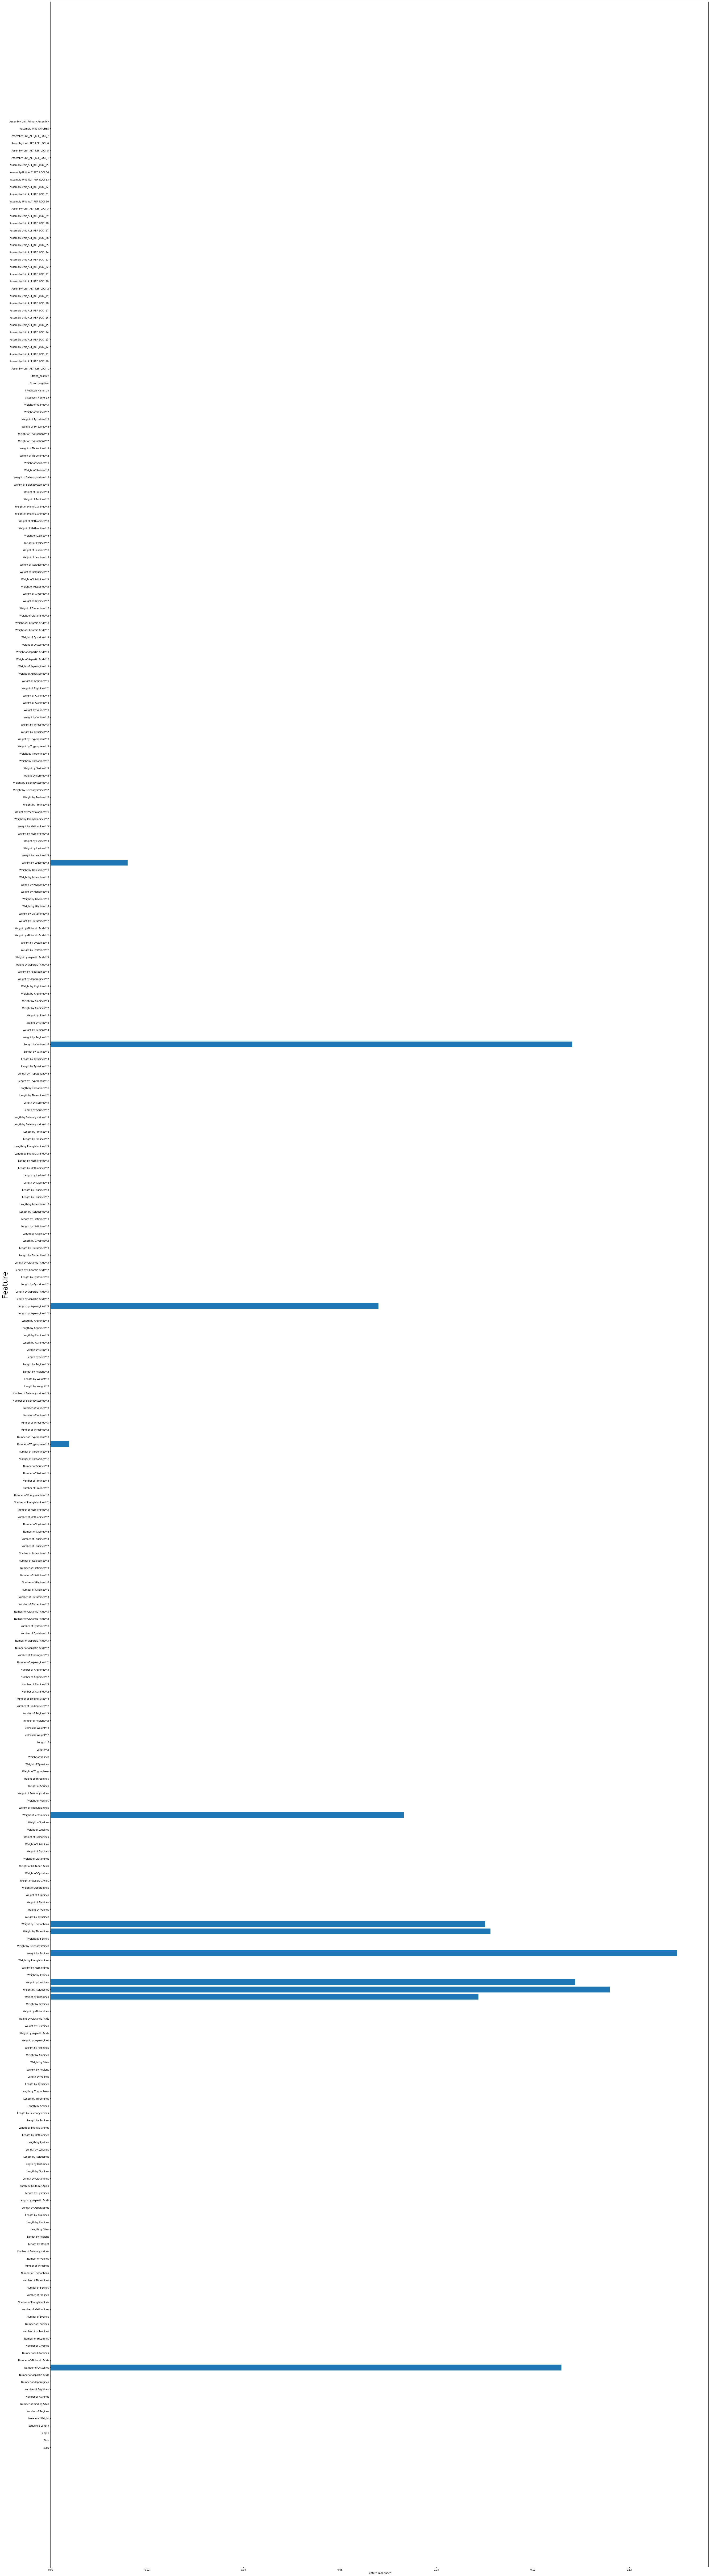

In [66]:
plot_feature_importances_locus(base_locus_clf)

In [67]:
feature_importance_locus_df = pd.DataFrame()
feature_importance_locus_df['Features'] = list(features_locus.columns)
feature_importance_locus_df['Importance'] = base_locus_clf.feature_importances_
feature_importance_locus_df.nlargest(15, 'Importance')

,Features,Importance
68,Weight by Prolines,0.129926
63,Weight by Isoleucines,0.115975
64,Weight by Leucines,0.108800
193,Length by Valines**3,0.108201
11,Number of Cysteines,0.105930
71,Weight by Threonines,0.091223
72,Weight by Tryptophans,0.090159
62,Weight by Histidines,0.088746
87,Weight of Methionines,0.073230
157,Length by Asparagines**3,0.068000


In [68]:
from sklearn.tree import DecisionTreeClassifier
base_strand_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=19)
base_strand_clf.fit(features_strand_train, target_strand_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
target_strand_preds_train = base_strand_clf.predict(features_strand_train)
acc_strand_train = accuracy_score(target_strand_train, target_strand_preds_train)*100
print('Strand Training Accuracy is: {0}'.format(acc_strand_train))
target_strand_preds_test = base_strand_clf.predict(features_strand_test)
acc_strand_test = accuracy_score(target_strand_test, target_strand_preds_test)*100
print('Strand Testing Accuracy is: {0}'.format(acc_strand_test))
conf_strand = confusion_matrix(target_strand_test, target_strand_preds_test)
print(conf_strand)
class_report_strand = classification_report(target_strand_test, target_strand_preds_test)
print(class_report_strand)

Strand Training Accuracy is: 65.41353383458647
Strand Testing Accuracy is: 63.77755511022044
[[875 140]
 [583 398]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.71      1015
           1       0.74      0.41      0.52       981

    accuracy                           0.64      1996
   macro avg       0.67      0.63      0.62      1996
weighted avg       0.67      0.64      0.62      1996



In [70]:
import matplotlib.pyplot as plt
def plot_feature_importances_strand(model):
    import matplotlib.pyplot as plt
    n_features = features_strand_train.shape[1]
    plt.figure(figsize=(50,200))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features_strand_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature', fontsize=30)

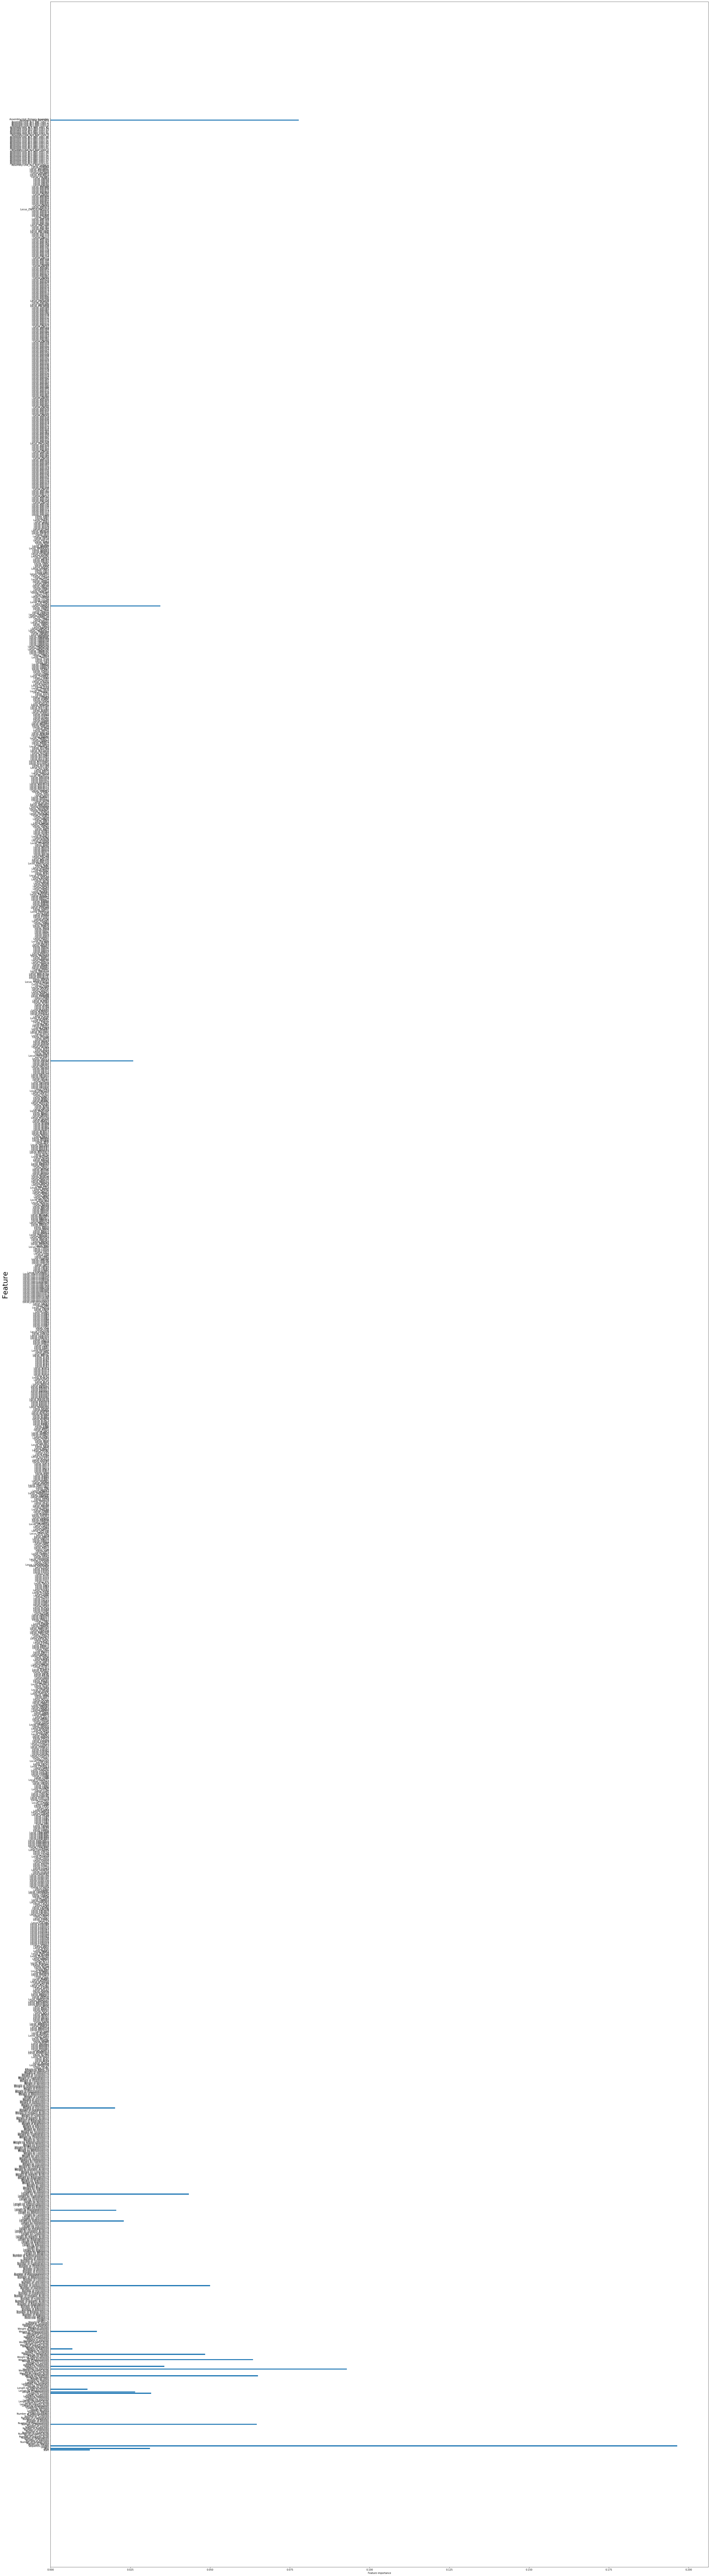

In [71]:
plot_feature_importances_strand(base_strand_clf)

In [73]:
feature_importance_strand_df = pd.DataFrame()
feature_importance_strand_df['Features'] = list(features_strand.columns)
feature_importance_strand_df['Importance'] = base_strand_clf.feature_importances_
feature_importance_strand_df.nlargest(25, 'Importance')

,Features,Importance
3,Sequence-Length,0.196393
60,Weight by Glutamines,0.092861
1731,Assembly-Unit_PATCHES,0.077794
55,Weight by Arginines,0.064973
19,Number of Methionines,0.064662
67,Weight by Phenylalanines,0.063459
122,Number of Isoleucines**2,0.050029
71,Weight by Threonines,0.048425
190,Length by Tyrosines**2,0.043332
62,Weight by Histidines,0.035686


# Base: Bagged Model

In [83]:
from sklearn.ensemble import BaggingClassifier
tree_locus = base_locus_clf
bagged_locus_tree = BaggingClassifier(tree_locus, n_estimators=15, random_state=19)
bagged_locus_tree.fit(features_locus_train, target_locus_train)
target_locus_pred_train = bagged_locus_tree.predict(features_locus_train)
target_locus_pred_test = bagged_locus_tree.predict(features_locus_test)
acc_locus_train = accuracy_score(target_locus_train, target_locus_preds_train)*100
acc_locus_test = accuracy_score(target_locus_test, target_locus_preds_test)*100
print('Locus Training Accuracy is: {0}'.format(acc_locus_train))
print('Locus Testing Accuracy is: {0}'.format(acc_locus_test))

Locus Training Accuracy is: 62.78195488721805
Locus Testing Accuracy is: 59.3984962406015


In [82]:
feature_importance_locus_bagged_df = pd.DataFrame()
feature_importance_locus_bagged_df['Features'] = list(features_locus.columns)
feature_importances_locus_bagged = np.mean([tree_locus.feature_importances_ for tree in bagged_locus_tree.estimators_], axis=0)
feature_importance_locus_bagged_df['Importance'] = feature_importances_locus_bagged
feature_importance_locus_bagged_df.nlargest(15, 'Importance')

,Features,Importance
68,Weight by Prolines,0.129926
63,Weight by Isoleucines,0.115975
64,Weight by Leucines,0.108800
193,Length by Valines**3,0.108201
11,Number of Cysteines,0.105930
71,Weight by Threonines,0.091223
72,Weight by Tryptophans,0.090159
62,Weight by Histidines,0.088746
87,Weight of Methionines,0.073230
157,Length by Asparagines**3,0.068000


In [84]:
from sklearn.ensemble import BaggingClassifier
tree_strand = base_strand_clf
bagged_strand_tree = BaggingClassifier(tree_strand, n_estimators=15, random_state=19)
bagged_strand_tree.fit(features_strand_train, target_strand_train)
target_strand_pred_train = bagged_strand_tree.predict(features_strand_train)
target_strand_pred_test = bagged_strand_tree.predict(features_strand_test)
acc_strand_train = accuracy_score(target_strand_train, target_strand_preds_train)*100
acc_strand_test = accuracy_score(target_strand_test, target_strand_preds_test)*100
print('Locus Training Accuracy is: {0}'.format(acc_strand_train))
print('Locus Testing Accuracy is: {0}'.format(acc_strand_test))

Locus Training Accuracy is: 65.41353383458647
Locus Testing Accuracy is: 63.77755511022044


In [87]:
feature_importance_strand_bagged_df = pd.DataFrame()
feature_importance_strand_bagged_df['Features'] = list(features_strand.columns)
feature_importances_strand_bagged = np.mean([tree_strand.feature_importances_ for tree in bagged_strand_tree.estimators_], axis=0)
feature_importance_strand_bagged_df['Importance'] = feature_importances_strand_bagged
feature_importance_strand_bagged_df.nlargest(25, 'Importance')

,Features,Importance
3,Sequence-Length,0.196393
60,Weight by Glutamines,0.092861
1731,Assembly-Unit_PATCHES,0.077794
55,Weight by Arginines,0.064973
19,Number of Methionines,0.064662
67,Weight by Phenylalanines,0.063459
122,Number of Isoleucines**2,0.050029
71,Weight by Threonines,0.048425
190,Length by Tyrosines**2,0.043332
62,Weight by Histidines,0.035686


# Base: Random Forest Model

In [91]:
target_locus_pred_train = forest_locus.predict(features_locus_train)
target_locus_pred_test = forest_locus.predict(features_locus_test)
acc_locus_train = accuracy_score(target_locus_train, target_locus_preds_train)*100
acc_locus_test = accuracy_score(target_locus_test, target_locus_preds_test)*100
print('Locus Training Accuracy is: {0}'.format(acc_locus_train))
print('Locus Testing Accuracy is: {0}'.format(acc_locus_test))

Locus Training Accuracy is: 62.78195488721805
Locus Testing Accuracy is: 59.3984962406015


In [100]:
feature_importance_forest_locus_df = pd.DataFrame()
feature_importance_forest_locus_df['Features'] = list(features_locus.columns)
feature_importances_forest_locus = forest_locus.feature_importances_
feature_importance_forest_locus_df['Importance'] = feature_importances_forest_locus
feature_importance_forest_locus_df.nlargest(140, 'Importance')

,Features,Importance
32,Length by Arginines,0.030983
79,Weight of Cysteines,0.028904
59,Weight by Glutamic Acids,0.026901
71,Weight by Threonines,0.023457
45,Length by Prolines,0.022521
...,...,...
82,Weight of Glycines,0.000230
140,Number of Tyrosines**2,0.000230
57,Weight by Aspartic Acids,0.000228
0,Start,0.000000


In [101]:
from sklearn.ensemble import RandomForestClassifier
forest_strand = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=21)
forest_strand.fit(features_strand_train, target_strand_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [103]:
target_strand_pred_train = forest_strand.predict(features_strand_train)
target_strand_pred_test = forest_strand.predict(features_strand_test)
acc_strand_train = accuracy_score(target_strand_train, target_strand_pred_train)*100
acc_strand_test = accuracy_score(target_strand_test, target_strand_pred_test)*100
print('Strand Training Accuracy is: {0}'.format(acc_strand_train))
print('Strand Testing Accuracy is: {0}'.format(acc_strand_test))

Strand Training Accuracy is: 73.61737677527151
Strand Testing Accuracy is: 70.29058116232466


In [116]:
feature_importance_forest_strand_df = pd.DataFrame()
feature_importance_forest_strand_df['Features'] = list(features_strand.columns)
feature_importances_forest_strand = forest_strand.feature_importances_
feature_importance_forest_strand_df['Importance'] = feature_importances_forest_strand
feature_importance_forest_strand_df.nlargest(190, 'Importance')

,Features,Importance
37,Length by Glutamines,0.020669
244,Weight of Asparagines**2,0.020442
279,Weight of Tyrosines**3,0.019910
1731,Assembly-Unit_PATCHES,0.019496
254,Weight of Glycines**2,0.018908
...,...,...
951,Locus_MYO9B,0.000460
253,Weight of Glutamines**3,0.000450
23,Number of Threonines,0.000433
218,Weight by Leucines**2,0.000138


## Training and Pruning

In [20]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_auc_score
# from sklearn.multiclass import OneVsOneClassifier
# SEED = 21
# max_depths = list(range(1,100))
# roc_auc_train = []
# roc_auc_test = []
# for i in max_depths:
#     dt_test = DecisionTreeClassifier(criterion='gini', max_depth=(i), random_state=SEED)
#     dt_test.fit(data_train, target_train)
#     target_preds_train = dt_test.predict(data_train)
#     target_scores_train = dt_test.score(data_train, target_preds_train)
#     roc_auc_train.append(roc_auc_score(target_train, target_scores_train, average='macro', multi_class='ovo'))
#     target_preds_test = dt_test.predict(data_test)
#     target_scores_test = dt_test.score(data_test, target_preds_test)
#     roc_auc_test.append(roc_auc_score(target_test, target_scores_test, average='macro', multi_class='ovo'))
# plt.plot(roc_auc_train, label='Train')
# plt.plot(roc_auc_test, label='Test')
# plt.legend()
# plt.title('AUC of Max Depth')

References
https://www.ncbi.nlm.nih.gov/grc/help/definitions/ # sequence role definitions
https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn # feature importances for bagged model
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html # multiclass roc